In [1]:
%matplotlib widget

import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd

from mpl_toolkits.mplot3d import axes3d

import scipy as sp
import scipy.interpolate

import numpy as np

from mpl_toolkits.mplot3d.proj3d import proj_transform
from matplotlib.text import Annotation

import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

%matplotlib inline
sns.set_style('darkgrid') # set the grid style for the seaborn plots
pd.set_option('display.float_format', lambda x: '%.5f' % x) # suppress scientific notation in pandas

In [127]:
data = pd.read_excel('data1.xlsx')

data = data[data['90s Played'] > 3].reset_index(drop=True)
data = data[data['Position'] != 'GK']
data = data[(data['Position'] == 'FW') | (data['Position'] == 'FWMF')].reset_index(drop='True')

data = data.drop(['Unnamed: 0','Player', 'Nationality', 'Position','Team', 'Season'], axis=1)
data

,Age,Matches Played,Matches Started,Minutes Played,90s Played,Goals,Assists,Non-Penalty Goals,Penalties Scored,Penalties Attempted,...,Aerials Lost,Aerial Win %,Tackles Attempted,Tackle Success %,Turnovers,Shots per Touch,Share of Touches in the Final Third %,Deep Progressions,Long Pass Preference %,Player_ID
0,19.00000,31.00000,15.00000,1726.00000,19.20000,0.26000,0.05000,0.26000,0.00000,0.00000,...,1.56000,50.00000,1.20000,47.50000,5.94000,0.08029,48.82212,1.95910,9.93873,Tammy Abraham_Swansea City_2017 - 2018
1,24.00000,17.00000,5.00000,611.00000,6.80000,0.00000,0.00000,0.00000,0.00000,0.00000,...,3.53000,41.50000,1.47000,40.13605,5.15000,0.03587,51.23068,1.92226,3.01790,Benik Afobe_Bournemouth_2017 - 2018
2,29.00000,25.00000,22.00000,1963.00000,21.80000,0.96000,0.28000,0.78000,0.18000,0.18000,...,0.69000,28.60000,0.78000,47.43590,5.74000,0.09883,63.07490,3.14566,2.68976,Sergio Agüero_Manchester City_2017 - 2018
3,27.00000,21.00000,16.00000,1354.00000,15.00000,0.20000,0.07000,0.20000,0.00000,0.00000,...,2.33000,47.00000,1.67000,52.09581,10.00000,0.04891,46.96429,4.51500,23.41060,Michail Antonio_West Ham_2017 - 2018
4,28.00000,18.00000,15.00000,1333.00000,14.80000,0.14000,0.07000,0.14000,0.00000,0.00000,...,1.28000,20.80000,3.52000,57.67045,3.72000,0.03025,38.57255,2.67244,9.93459,Scott Arfield_Burnley_2017 - 2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,29.00000,21.00000,21.00000,1812.00000,20.10000,0.50000,0.25000,0.30000,0.20000,0.20000,...,5.72000,22.80000,0.90000,61.11111,6.18000,0.06393,51.01027,2.22253,5.03960,Callum Wilson_Newcastle Utd_2020 - 2021
389,29.00000,23.00000,22.00000,1877.00000,20.90000,0.24000,0.00000,0.24000,0.00000,0.00000,...,5.55000,48.90000,0.90000,63.33333,4.84000,0.05842,50.36427,1.31620,4.29936,Chris Wood_Burnley_2020 - 2021
390,31.00000,14.00000,1.00000,357.00000,4.00000,0.00000,0.25000,0.00000,0.00000,0.00000,...,0.75000,50.00000,2.25000,55.55556,4.75000,0.03739,45.37488,5.04406,14.66276,Andriy Yarmolenko_West Ham_2020 - 2021
391,28.00000,20.00000,19.00000,1712.00000,19.00000,0.47000,0.11000,0.37000,0.11000,0.11000,...,1.21000,25.80000,1.48000,50.00000,9.26000,0.05333,53.76344,3.61548,7.92683,Wilfried Zaha_Crystal Palace_2020 - 2021


In [128]:
#Goalkeepers

#data = data[['Player_ID','GK Saves','GK Save %','GK Post-Shot xG Against per Shot on Target','GK Post-Shot xG Against PlusMinus', 'GK Long Passes Completed', 'GK Long Pass Preference %', 'GK Average Pass Length (Yd)', 'GK Long Goal Kick Preference %','GK Average Goal Kick Length (Yd)', 'GK Sweeping Actions', 'GK Average Sweeping Action Distance From Goal (Yd)']]

#Centerbacks

#data = data[['Player_ID','Pass Completion %', 'Pressures','Fouls Committed','Tackle Success %','Tackles Won','Interceptions','Aerials Won','Aerial Win %','Short Passes Completed','Long Passes Completed','Goal Contributions per 90']]

#Fullbacks

#data = data[['Player_ID','Tackles + Interceptions','Pressures', 'Deep Progressions','Share of Touches in the Final Third %','Pass Completion %','Goal Contributions per 90','Dribbles Completed', 'Turnovers', 'Aerials Won', 'Crosses Completed into Opposition Box', 'Tackle Success %']]

#Midfielders

#data = data[['Player_ID', 'Passes Completed','Pass Completion %','Deep Progressions','xA', 'Goal Contributions per 90', 'Dribbles Completed','Fouls Won','Turnovers','Successful Pressures', 'Pressures', 'Tackles + Interceptions']]

#Attacking Midfielders/Wingers

#data = data[['Player_ID', 'Non-Penalty xG','Shots', 'Touches In Opposition Box', 'Pass Completion %', 'Crosses Completed into Opposition Box', 'xA','Fouls Won','Dribbles Completed','Turnovers', 'Successful Pressures', 'Goals per Shot']]

#Strikers

data = data[['Player_ID','Non-Penalty xG','Goals - xG','Shots','Touches In Opposition Box','Shots per Touch', 'xA','Successful Pressures','Pressures','Aerials Won','Dribbles Completed','Non-Penalty xG per Shot']]

In [129]:
for i in range(len(data.columns)):
    Attribute_id = 'Attribute_' + str(i)
    Attribute_id = data.iloc[:,i]

In [130]:
data

,Player_ID,Non-Penalty xG,Goals - xG,Shots,Touches In Opposition Box,Shots per Touch,xA,Successful Pressures,Pressures,Aerials Won,Dribbles Completed,Non-Penalty xG per Shot
0,Tammy Abraham_Swansea City_2017 - 2018,0.33000,-0.07000,2.24000,3.75000,0.08029,0.04000,3.02000,9.27000,1.56000,1.35000,0.15000
1,Benik Afobe_Bournemouth_2017 - 2018,0.21000,-0.21000,1.18000,4.12000,0.03587,0.01000,4.85000,16.50000,2.50000,0.59000,0.18000
2,Sergio Agüero_Manchester City_2017 - 2018,0.62000,0.20000,4.22000,8.17000,0.09883,0.27000,3.21000,12.00000,0.28000,1.42000,0.15000
3,Michail Antonio_West Ham_2017 - 2018,0.16000,0.04000,2.47000,2.60000,0.04891,0.04000,4.07000,13.70000,2.07000,2.80000,0.06000
4,Scott Arfield_Burnley_2017 - 2018,0.08000,0.05000,1.08000,1.76000,0.03025,0.03000,6.55000,26.80000,0.34000,0.81000,0.07000
...,...,...,...,...,...,...,...,...,...,...,...,...
388,Callum Wilson_Newcastle Utd_2020 - 2021,0.32000,0.02000,1.79000,4.83000,0.06393,0.10000,4.03000,13.70000,1.69000,1.24000,0.18000
389,Chris Wood_Burnley_2020 - 2021,0.36000,-0.12000,1.77000,3.68000,0.05842,0.05000,2.68000,10.20000,5.31000,0.33000,0.20000
390,Andriy Yarmolenko_West Ham_2020 - 2021,0.10000,-0.10000,1.75000,4.25000,0.03739,0.25000,4.25000,12.80000,0.75000,1.75000,0.06000
391,Wilfried Zaha_Crystal Palace_2020 - 2021,0.24000,0.16000,2.32000,5.47000,0.05333,0.11000,3.58000,17.80000,0.42000,1.74000,0.10000


In [131]:
df = pd.DataFrame()
for i in range(len(data.columns)):
    df[f"Attribute_{i}"] = data.iloc[:,i]
    
df['Index'] = ['Point'] * len(df)
df['ID'] = range(1, 1+len(df))
df["Index"] = df["Index"] + ' ' + df["ID"].astype(str)
df = df.drop(['ID'], axis=1)

df["Index"] = df["Attribute_0"]
df = df.drop(['Attribute_0'], axis=1)
df

,Attribute_1,Attribute_2,Attribute_3,Attribute_4,Attribute_5,Attribute_6,Attribute_7,Attribute_8,Attribute_9,Attribute_10,Attribute_11,Index
0,0.33000,-0.07000,2.24000,3.75000,0.08029,0.04000,3.02000,9.27000,1.56000,1.35000,0.15000,Tammy Abraham_Swansea City_2017 - 2018
1,0.21000,-0.21000,1.18000,4.12000,0.03587,0.01000,4.85000,16.50000,2.50000,0.59000,0.18000,Benik Afobe_Bournemouth_2017 - 2018
2,0.62000,0.20000,4.22000,8.17000,0.09883,0.27000,3.21000,12.00000,0.28000,1.42000,0.15000,Sergio Agüero_Manchester City_2017 - 2018
3,0.16000,0.04000,2.47000,2.60000,0.04891,0.04000,4.07000,13.70000,2.07000,2.80000,0.06000,Michail Antonio_West Ham_2017 - 2018
4,0.08000,0.05000,1.08000,1.76000,0.03025,0.03000,6.55000,26.80000,0.34000,0.81000,0.07000,Scott Arfield_Burnley_2017 - 2018
...,...,...,...,...,...,...,...,...,...,...,...,...
388,0.32000,0.02000,1.79000,4.83000,0.06393,0.10000,4.03000,13.70000,1.69000,1.24000,0.18000,Callum Wilson_Newcastle Utd_2020 - 2021
389,0.36000,-0.12000,1.77000,3.68000,0.05842,0.05000,2.68000,10.20000,5.31000,0.33000,0.20000,Chris Wood_Burnley_2020 - 2021
390,0.10000,-0.10000,1.75000,4.25000,0.03739,0.25000,4.25000,12.80000,0.75000,1.75000,0.06000,Andriy Yarmolenko_West Ham_2020 - 2021
391,0.24000,0.16000,2.32000,5.47000,0.05333,0.11000,3.58000,17.80000,0.42000,1.74000,0.10000,Wilfried Zaha_Crystal Palace_2020 - 2021


In [132]:
dft = df
df1 = dft.drop(['Index'], axis = 1)
df1.fillna(0, inplace=True)
df1

,Attribute_1,Attribute_2,Attribute_3,Attribute_4,Attribute_5,Attribute_6,Attribute_7,Attribute_8,Attribute_9,Attribute_10,Attribute_11
0,0.33000,-0.07000,2.24000,3.75000,0.08029,0.04000,3.02000,9.27000,1.56000,1.35000,0.15000
1,0.21000,-0.21000,1.18000,4.12000,0.03587,0.01000,4.85000,16.50000,2.50000,0.59000,0.18000
2,0.62000,0.20000,4.22000,8.17000,0.09883,0.27000,3.21000,12.00000,0.28000,1.42000,0.15000
3,0.16000,0.04000,2.47000,2.60000,0.04891,0.04000,4.07000,13.70000,2.07000,2.80000,0.06000
4,0.08000,0.05000,1.08000,1.76000,0.03025,0.03000,6.55000,26.80000,0.34000,0.81000,0.07000
...,...,...,...,...,...,...,...,...,...,...,...
388,0.32000,0.02000,1.79000,4.83000,0.06393,0.10000,4.03000,13.70000,1.69000,1.24000,0.18000
389,0.36000,-0.12000,1.77000,3.68000,0.05842,0.05000,2.68000,10.20000,5.31000,0.33000,0.20000
390,0.10000,-0.10000,1.75000,4.25000,0.03739,0.25000,4.25000,12.80000,0.75000,1.75000,0.06000
391,0.24000,0.16000,2.32000,5.47000,0.05333,0.11000,3.58000,17.80000,0.42000,1.74000,0.10000


In [133]:
for i in range(len(df1.columns)):
    print('Attribute_' + str(i) + str(df1.iloc[:,i].isnull().values.any()))

Attribute_0False
Attribute_1False
Attribute_2False
Attribute_3False
Attribute_4False
Attribute_5False
Attribute_6False
Attribute_7False
Attribute_8False
Attribute_9False
Attribute_10False


In [134]:
scaler = StandardScaler()
scaler.fit(df1)
scaled_features = scaler.transform(df1)

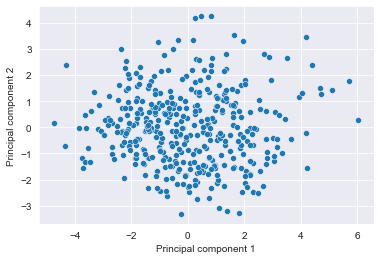

In [135]:
pca = PCA(n_components=2)
pca.fit(scaled_features)
pca_data = pca.transform(scaled_features)
pca_df = pd.DataFrame(data = pca_data, columns = ['PC1', 'PC2'])

sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.show()

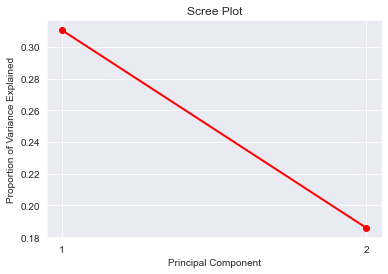

In [136]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.xticks(np.arange(1,3,1))
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [137]:
print ("Proportion of Variance Explained : ", pca.explained_variance_ratio_)  
out_sum = np.cumsum(pca.explained_variance_ratio_)  
print ("Cumulative Prop. Variance Explained: ", out_sum)

Proportion of Variance Explained :  [0.31043544 0.18586839]
Cumulative Prop. Variance Explained:  [0.31043544 0.49630383]


In [138]:
print(pca.explained_variance_) 

[3.42350101 2.04976798]


In [139]:
pc1_loading_scores = pd.DataFrame(data=pca.components_[0], index=df1.columns, columns=['PC1 Loading Score'])
pc1_loading_scores.sort_values(by='PC1 Loading Score', ascending=False, inplace=True)
pc1_loading_scores

,PC1 Loading Score
Attribute_1,0.50258
Attribute_5,0.45590
Attribute_3,0.44810
Attribute_4,0.37724
Attribute_11,0.30900
Attribute_9,0.11726
Attribute_6,0.02618
Attribute_2,0.00830
Attribute_10,-0.11861
Attribute_7,-0.15607


In [140]:
pc2_loading_scores = pd.DataFrame(data=pca.components_[1], index=df1.columns, columns=['PC2 Loading Score'])
pc2_loading_scores.sort_values(by='PC2 Loading Score', ascending=False, inplace=True)
pc2_loading_scores

,PC2 Loading Score
Attribute_10,0.53090
Attribute_6,0.52820
Attribute_4,0.33338
Attribute_2,0.25908
Attribute_3,0.16150
Attribute_7,0.10788
Attribute_1,0.03962
Attribute_8,0.01155
Attribute_11,-0.12648
Attribute_5,-0.13576


In [141]:
# KMeans clustering 

pca_df = pd.DataFrame(data=pca_data, index=dft['Index'], columns=['PC 1', 'PC 2'])
pca_df.reset_index(inplace=True) # reset the index
pca_df.head(3)

scaler = StandardScaler()
scaler.fit(pca_df.drop('Index', axis=1)) 
scaled_pca_features = scaler.transform(pca_df.drop('Index', axis=1))
scaled_pca_data = pd.DataFrame(data=scaled_pca_features, columns=pca_df.drop('Index', axis=1).columns)

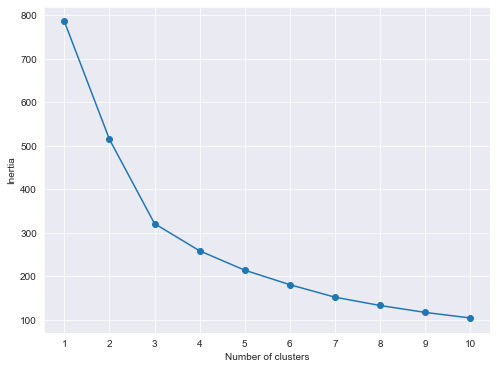

In [142]:
#Elbow method

scaler = StandardScaler()
scaler.fit(pca_df.drop('Index', axis=1))
scaled_pca_features = scaler.transform(pca_df.drop('Index', axis=1))
scaled_pca_data = pd.DataFrame(data=scaled_pca_features, columns=pca_df.drop('Index', axis=1).columns)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X=scaled_pca_data)
    inertia.append(kmeans.inertia_)
elbow_df = pd.DataFrame({'Number of clusters':range(1, 11), 'Inertia':inertia})

plt.figure(figsize=(8,6))
plt.plot(elbow_df['Number of clusters'], elbow_df['Inertia'], marker='o')
plt.xlabel('Number of clusters')
plt.xticks(np.arange(1, len(inertia)+1, 1))
plt.ylabel('Inertia')
plt.show()

In [143]:
# KMeans cluster creation

kmeans = KMeans(n_clusters=3)
kmeans.fit(X=scaled_pca_data)
pca_df['Cluster Label'] = kmeans.labels_ # add cluster labels for players as a new column to the pca_df dataframe
print(pca_df.columns.tolist())

['Index', 'PC 1', 'PC 2', 'Cluster Label']


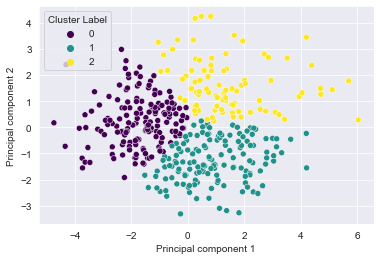

In [144]:
# Analysis and visualisation

sns.scatterplot(x='PC 1', y='PC 2', data=pca_df, hue='Cluster Label', palette='viridis')
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.show()

In [145]:
pca_cluster_0 = pca_df[pca_df['Cluster Label']==0]['Index']
pca_cluster_1 = pca_df[pca_df['Cluster Label']==1]['Index']
pca_cluster_2 = pca_df[pca_df['Cluster Label']==2]['Index']

In [146]:
print('\nCluster 0 Points:\n')
print(pca_cluster_0)
print('\n\n')
print('Cluster 1 Points:\n')
print(pca_cluster_1)
print('\n\n')
print('Cluster 2 Points:\n')
print(pca_cluster_2)


Cluster 0 Points:

3          Michail Antonio_West Ham_2017 - 2018
4             Scott Arfield_Burnley_2017 - 2018
8           André Ayew_Swansea City_2017 - 2018
9               André Ayew_West Ham_2017 - 2018
10         Jordan Ayew_Swansea City_2017 - 2018
                         ...                   
381       Leandro Trossard_Brighton_2020 - 2021
387                 Willian_Arsenal_2020 - 2021
390      Andriy Yarmolenko_West Ham_2020 - 2021
391    Wilfried Zaha_Crystal Palace_2020 - 2021
392            Hakim Ziyech_Chelsea_2020 - 2021
Name: Index, Length: 156, dtype: object



Cluster 1 Points:

0             Tammy Abraham_Swansea City_2017 - 2018
1                Benik Afobe_Bournemouth_2017 - 2018
6      Pierre-Emerick Aubameyang_Arsenal_2017 - 2018
7             Charlie Austin_Southampton_2017 - 2018
11                 Ashley Barnes_Burnley_2017 - 2018
                           ...                      
384            Ollie Watkins_Aston Villa_2020 - 2021
385               D

In [147]:
final_data = pd.merge(left=pca_df[['Index','PC 1','PC 2', 'Cluster Label']],
                      right=df,
                      how='inner', on='Index')

In [148]:
final_data = final_data.sort_values(by='PC 1', ascending=False)
#final_data.sort_values(by='PC 1', ascending=False).head(10)
final_data.reset_index(drop=True, inplace=True)
final_data

,Index,PC 1,PC 2,Cluster Label,Attribute_1,Attribute_2,Attribute_3,Attribute_4,Attribute_5,Attribute_6,Attribute_7,Attribute_8,Attribute_9,Attribute_10,Attribute_11
0,Harry Kane_Tottenham_2017 - 2018,6.03994,0.28521,2,0.70000,0.11000,5.29000,6.81000,0.15605,0.08000,2.92000,9.56000,0.99000,1.29000,0.13000
1,Sergio Agüero_Manchester City_2019 - 2020,5.69913,1.77893,2,0.73000,0.12000,4.53000,9.57000,0.12761,0.15000,3.48000,13.80000,0.12000,1.68000,0.16000
2,Gabriel Jesus_Manchester City_2019 - 2020,5.11799,1.44120,2,0.78000,-0.20000,4.51000,9.03000,0.11136,0.17000,5.62000,18.50000,1.55000,2.26000,0.18000
3,Olivier Giroud_Arsenal_2017 - 2018,4.71239,1.26707,2,0.70000,0.23000,4.42000,8.60000,0.10449,0.21000,5.58000,19.30000,2.33000,0.47000,0.16000
4,Sergio Agüero_Manchester City_2018 - 2019,4.69917,1.49800,2,0.70000,0.01000,4.32000,8.83000,0.10335,0.20000,4.51000,16.90000,0.40000,1.06000,0.16000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,Scott Arfield_Burnley_2017 - 2018,-3.73965,-1.18075,0,0.08000,0.05000,1.08000,1.76000,0.03025,0.03000,6.55000,26.80000,0.34000,0.81000,0.07000
389,Marc Albrighton_Leicester City_2018 - 2019,-3.84046,-0.03439,0,0.06000,0.05000,1.05000,1.49000,0.01916,0.17000,5.58000,21.70000,0.50000,1.22000,0.06000
390,Emi Buendía_Norwich City_2019 - 2020,-4.31154,2.40231,0,0.08000,-0.04000,1.46000,2.08000,0.02017,0.26000,7.55000,28.90000,0.84000,3.87000,0.05000
391,Lukas Rupp_Norwich City_2019 - 2020,-4.33927,-0.72559,0,0.04000,-0.04000,0.52000,1.95000,0.01171,0.10000,6.23000,24.90000,0.52000,1.17000,0.08000
